# Step 1: Load the IMDB Dataset of 50K Movie Reviews

In [2]:
import pandas as pd
df = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Drop any duplicate entries from the dataset, keeping only the first entry

In [3]:
df = df.drop_duplicates(subset = ['review'], keep = 'first')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Explore the Distribution of the classes in the dataset

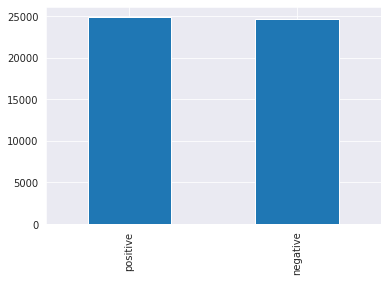

In [49]:
sentiment_plot = df['sentiment'].value_counts().plot(kind = 'bar')
fig = sentiment_plot.get_figure()
fig.savefig("class_distribution.png")

In [5]:
len(df)

49582

Explore the distribution of the length of reviews

In [6]:
seqlen = df['review'].apply(lambda x: len(x.split()))
seqlen

0        307
1        162
2        166
3        138
4        230
        ... 
49995    194
49996    112
49997    230
49998    212
49999    129
Name: review, Length: 49582, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


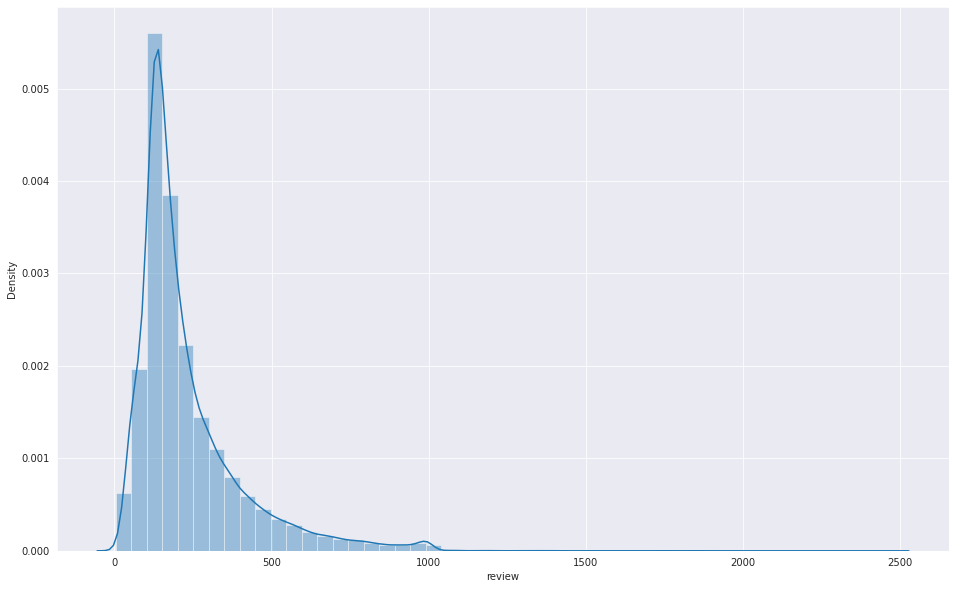

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize = (16, 10))
seqlen_plot = sns.distplot(seqlen)

fig = seqlen_plot.get_figure()
fig.savefig("seqlen_plot.png")

In [9]:
# Choosing our max_length of sequence as 512 to capture maximum amount of data
SEQ_LEN = 512

Now let's get to tokenizing our inputs

In [10]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [11]:
tokens = tokenizer.encode_plus("hello world", max_length = SEQ_LEN, 
                               truncation = True, padding = 'max_length', 
                               add_special_tokens = True, return_token_type_ids = False, 
                               return_attention_mask = True, return_tensors = 'tf')
tokens

2021-11-18 05:35:21.083763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 05:35:21.084753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 05:35:21.085464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 05:35:21.087227: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

{'input_ids': <tf.Tensor: shape=(1, 512), dtype=int32, numpy=
array([[  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0, 

In [13]:
import numpy as np

Xids = np.zeros((len(df), SEQ_LEN))
Xmask = np.zeros((len(df), SEQ_LEN))

Xids.shape, Xmask.shape

((49582, 512), (49582, 512))

In [14]:
for i, sequence in enumerate(df['review']):
    tokens = tokenizer.encode_plus(sequence, max_length = SEQ_LEN, 
                               truncation = True, padding = 'max_length', 
                               add_special_tokens = True, return_token_type_ids = False, 
                               return_attention_mask = True, return_tensors = 'tf')
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [15]:
Xids

array([[ 101., 1448., 1104., ...,    0.,    0.,    0.],
       [ 101.,  138., 7310., ...,    0.,    0.,    0.],
       [ 101.,  146., 1354., ...,    0.,    0.,    0.],
       ...,
       [ 101.,  146., 1821., ...,    0.,    0.,    0.],
       [ 101.,  146.,  112., ...,    0.,    0.,    0.],
       [ 101., 1302., 1141., ...,    0.,    0.,    0.]])

In [16]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [17]:
class_map = {
    "positive": 0,
    "negative": 1
}
df['Sentiment'] = df['sentiment'].map(class_map)
arr = df['Sentiment'].values
arr, arr.shape

(array([0, 0, 0, ..., 1, 1, 1]), (49582,))

In [18]:
labels = np.zeros((len(df), arr.max() + 1))
labels.shape

(49582, 2)

In [19]:
labels[np.arange(len(df)), arr] = 1

In [20]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Save the input_ids, mask and labels for reusability

In [21]:
import numpy as np
with open('../working/movie-xids.npy', 'wb') as f:
    np.save(f, Xids)
with open('../working/movie-xmask.npy', 'wb') as f:
    np.save(f, Xmask)
with open('../working/movie-labels.npy', 'wb') as f:
    np.save(f, labels)

In [22]:
del Xids, Xmask, labels

# Step 2: Create Data Pipiline for Model Input

In [23]:
import numpy as np

with open('../working/movie-xids.npy', 'rb') as f:
    xids = np.load(f, allow_pickle = True)
with open('../working/movie-xmask.npy', 'rb') as f:
    xmask = np.load(f, allow_pickle = True)
with open('../working/movie-labels.npy', 'rb') as f:
    labels = np.load(f, allow_pickle = True)

In [24]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [25]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [26]:
dataset = tf.data.Dataset.from_tensor_slices((xids, xmask, labels))
dataset.take(1)

<TakeDataset shapes: ((512,), (512,), (2,)), types: (tf.float64, tf.float64, tf.float64)>

In [27]:
def map_fn(input_ids, masks, labels):
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

In [28]:
dataset = dataset.map(map_fn)
dataset.take(1)

<TakeDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, (2,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [29]:
batch_size = 16
dataset = dataset.shuffle(100000).batch(batch_size, drop_remainder = True)
dataset.take(1)

<TakeDataset shapes: ({input_ids: (16, 512), attention_mask: (16, 512)}, (16, 2)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [30]:
DS_LEN = len(list(dataset))
DS_LEN

2021-11-18 05:37:06.810846: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3098

In [31]:
split = 0.9

In [32]:
# Here we'll be dividing the train and test in 9:1
train = dataset.take(round(DS_LEN * split))
test_ds = dataset.skip(round(DS_LEN * split))

In [33]:
# We'll further be dividing the train set in train and validation set in 9:1
train_size = len(list(train))
train_ds = train.take(round(train_size * split))
val_ds = train.skip(round(train_size * split))

In [34]:
test_ds.take(1)

<TakeDataset shapes: ({input_ids: (16, 512), attention_mask: (16, 512)}, (16, 2)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [35]:
train_ds.take(1)

<TakeDataset shapes: ({input_ids: (16, 512), attention_mask: (16, 512)}, (16, 2)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [36]:
val_ds.take(1)

<TakeDataset shapes: ({input_ids: (16, 512), attention_mask: (16, 512)}, (16, 2)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

# Step 3: Build and Train our Model

In [37]:
from transformers import TFAutoModel
bert = TFAutoModel.from_pretrained('bert-base-cased')
bert.summary()

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Two inputs
input_ids = tf.keras.layers.Input(shape = (SEQ_LEN,), name = 'input_ids', dtype = 'int32')
mask = tf.keras.layers.Input(shape = (SEQ_LEN,), name = 'attention_mask', dtype = 'int32')

#Transformer
embeddings = bert.bert(input_ids, attention_mask = mask)[0]

#classifier head
# x = tf.keras.layers.Dense(1024, activation = 'relu')(embeddings)
# y = tf.keras.layers.Dense(2, activation = 'softmax', name = 'outputs')(x)

# X = tf.keras.layers.LSTM(64)(embeddings)
# X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.Dense(64, activation='relu')(X)
# X = tf.keras.layers.Dropout(0.1)(X)
# y = tf.keras.layers.Dense(2, activation = 'softmax', name = 'outputs')(X)

X = tf.keras.layers.Dropout(0.1)(embeddings)
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(768))(X)
y = tf.keras.layers.Dense(2, activation='softmax', name='outputs')(X)

model = tf.keras.Model(inputs = [input_ids, mask], outputs = y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_38 (Dropout)            (None, 512, 768)     0           bert[1][0]                   

In [40]:
model.layers[2].trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 108310272   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_38 (Dropout)            (None, 512, 768)     0           bert[1][0]                   

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


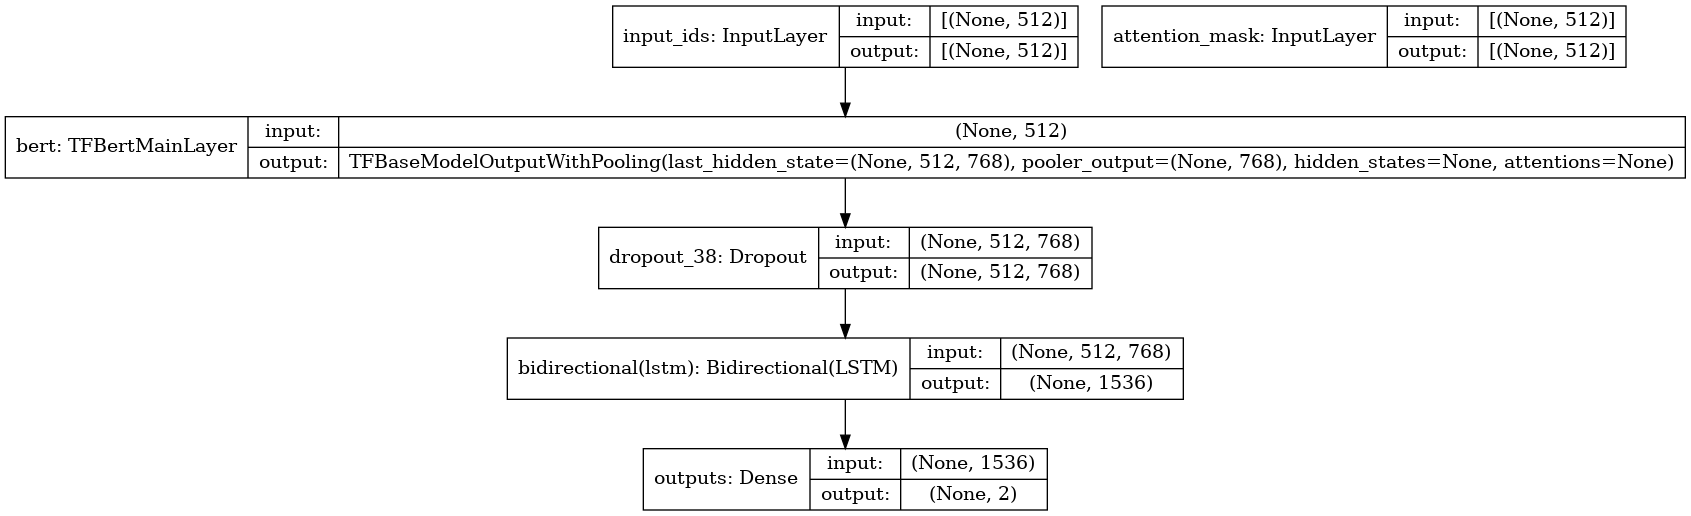

In [41]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

## Start Training

In [43]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 3
)

Epoch 1/3


2021-11-18 05:39:46.325944: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2509/2509 [==============================] - 1656s 656ms/step - loss: 0.3163 - accuracy: 0.8618 - val_loss: 0.2292 - val_accuracy: 0.9113
Epoch 2/3
2509/2509 [==============================] - 1645s 655ms/step - loss: 0.2281 - accuracy: 0.9086 - val_loss: 0.2146 - val_accuracy: 0.9155
Epoch 3/3
2509/2509 [==============================] - 1645s 655ms/step - loss: 0.2101 - accuracy: 0.9169 - val_loss: 0.1631 - val_accuracy: 0.9366


In [44]:
model.save('../working/sentiment_model_imdb')

2021-11-18 07:03:07.969208: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [45]:
history.history

{'loss': [0.31630367040634155, 0.22810769081115723, 0.21009497344493866],
 'accuracy': [0.8618224263191223, 0.9086040258407593, 0.9169489741325378],
 'val_loss': [0.22921189665794373, 0.21464747190475464, 0.16312329471111298],
 'val_accuracy': [0.9112903475761414, 0.9155465960502625, 0.9366039633750916]}

## Evaluate the Model:

In [46]:
train_loss, train_accuracy = model.evaluate(train_ds)
print("train_loss: ", train_loss)
print("train_accuracy: ", train_accuracy)

2509/2509 [==============================] - 1013s 403ms/step - loss: 0.1696 - accuracy: 0.9340
train_loss:  0.16955026984214783
train_accuracy:  0.9339876174926758


In [47]:
val_loss, val_accuracy = model.evaluate(val_ds)
print("val_loss: ", val_loss)
print("val_accuracy: ", val_accuracy)

279/279 [==============================] - 114s 404ms/step - loss: 0.1629 - accuracy: 0.9341
val_loss:  0.16291719675064087
val_accuracy:  0.9341397881507874


In [48]:
test_loss, test_accuracy = model.evaluate(test_ds)
print("test_loss: ", test_loss)
print("test_accuracy: ", test_accuracy)

310/310 [==============================] - 127s 404ms/step - loss: 0.1682 - accuracy: 0.9337
test_loss:  0.1682494878768921
test_accuracy:  0.9336693286895752


# Load and Test Model on Examples

In [51]:
import tensorflow as tf
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = tf.keras.models.load_model('sentiment_model_imdb')

code_to_category = {
    0: "positive",
    1: "negative"
}
def pred_text(model, text, max_length = 512):
    tokens = tokenizer.encode_plus(text, max_length = max_length, 
                               truncation = True, padding = 'max_length', 
                               add_special_tokens = True, return_token_type_ids = False, 
                               return_attention_mask = True, return_tensors = 'tf')
    probs = model.predict({
        'input_ids': tf.cast(tokens['input_ids'], tf.float64),
        'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)
    })
    
    pred = np.argmax(probs[0])
    
    prediction = code_to_category[pred]
    confidence = probs[0][pred]
    
    return prediction, confidence

In [52]:
text = "This movie was amazingly brilliant."
pred_text(model, text)

('positive', 0.98516893)

In [53]:
text = "This movie was amazingly awful."
pred_text(model, text)

('negative', 0.99297184)

In [54]:
text = "Maybe they should try to get a better cast next time."
pred_text(model, text)

('negative', 0.75620496)

In [55]:
text = "Movie sucks!!"
pred_text(model, text)

('negative', 0.9108512)

In [56]:
text = "Movie rocks!!"
pred_text(model, text)

('positive', 0.59613585)

In [57]:
text = "Only the first half of the movie was enjoyable"
pred_text(model, text)

('negative', 0.54951346)

In [58]:
text = "They could have spent the money better helping people"
pred_text(model, text)

('negative', 0.7509108)

Download Model

In [59]:
import shutil
shutil.make_archive('../working/sentiment_model_imdb', 'zip', '../working/sentiment_model_imdb')

'/kaggle/working/sentiment_model_imdb.zip'

In [60]:
from IPython.display import FileLink
FileLink(r'sentiment_model_imdb.zip')

/kaggle/working/sentiment_model_imdb.zip